In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
choice = 1  #start from 0
devices = ['sg13_lv_nmos', 'sg13_lv_pmos', 'sg13_hv_nmos', 'sg13_hv_pmos']

# widths used for characterization
w = np.array([5, 5, 5, 5])

In [73]:
# read ngspice data
df_raw = pd.read_csv('./simulation/techsweep_'+devices[choice]+'.txt', sep='\s+')
par_names = df_raw.columns.to_list()
fet_name = par_names[1].split('[')[0]

# remove unwanted columns and rename for readability
df = df_raw.drop(['g', 'g.1', 'b', 'd', 'n'], axis=1)
df = df.apply(pd.to_numeric)
df.columns = df.columns.str.replace(fet_name, '')
df.columns = df.columns.str.replace(fet_name[1:], '')
df.columns = df.columns.str.replace('[dc]', '')
df.columns = df.columns.str.replace('onoise..', 'n')
df.columns = df.columns.str.removeprefix('@')
df.columns = df.columns.str.removeprefix('[')
df.columns = df.columns.str.removesuffix(']')
df

,cdd,cgb,cgd,cgdol,cgg,cgs,cgsol,cjd,cjs,css,...,gm,gmb,ids,l,sfl,sid,vth,vb,vd,vg
0,1.879000e-20,5.996000e-16,2.399000e-19,2.422000e-15,6.001000e-16,2.399000e-19,2.422000e-15,1.834000e-15,1.834000e-15,1.879000e-20,...,-1.830000e-12,0.000000e+00,0.000000e+00,1.300000e-07,0.000000e+00,5.780000e-29,0.4281,0.0,0.000,0.0
1,6.432000e-21,5.501000e-16,1.359000e-19,2.422000e-15,5.503000e-16,1.359000e-19,2.422000e-15,1.682000e-15,1.682000e-15,6.432000e-21,...,-1.830000e-12,0.000000e+00,0.000000e+00,1.300000e-07,0.000000e+00,1.994000e-29,0.4575,-0.2,0.000,0.0
2,2.443000e-21,5.125000e-16,8.599000e-20,2.422000e-15,5.127000e-16,8.599000e-20,2.422000e-15,1.571000e-15,1.571000e-15,2.443000e-21,...,-1.830000e-12,-3.988000e-34,0.000000e+00,1.300000e-07,0.000000e+00,7.633000e-30,0.4852,-0.4,0.000,0.0
3,8.014000e-21,5.996000e-16,-4.961000e-18,2.412000e-15,6.000000e-16,5.381000e-18,2.422000e-15,1.812000e-15,1.834000e-15,1.925000e-20,...,8.468000e-10,1.836000e-10,3.257000e-11,1.300000e-07,7.319000e-28,4.282000e-29,0.4280,0.0,0.025,0.0
4,2.739000e-21,5.501000e-16,-5.059000e-18,2.412000e-15,5.503000e-16,5.288000e-18,2.422000e-15,1.666000e-15,1.682000e-15,6.601000e-21,...,2.982000e-10,5.657000e-11,1.126000e-11,1.300000e-07,9.211000e-29,1.480000e-29,0.4574,-0.2,0.025,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129649,3.089000e-16,9.862000e-15,3.561000e-16,2.431000e-15,1.298000e-13,1.196000e-13,2.659000e-15,1.264000e-15,1.682000e-15,8.068000e-14,...,9.222000e-05,1.992000e-05,4.171000e-05,3.000000e-06,1.978000e-18,2.523000e-24,0.3814,-0.2,1.175,1.2
129650,2.678000e-16,9.649000e-15,3.107000e-16,2.431000e-15,1.294000e-13,1.194000e-13,2.659000e-15,1.225000e-15,1.571000e-15,8.001000e-14,...,8.818000e-05,1.747000e-05,3.798000e-05,3.000000e-06,1.668000e-18,2.366000e-24,0.4111,-0.4,1.175,1.2
129651,3.252000e-16,1.010000e-14,3.718000e-16,2.422000e-15,1.303000e-13,1.198000e-13,2.659000e-15,1.303000e-15,1.834000e-15,8.149000e-14,...,9.652000e-05,2.302000e-05,4.601000e-05,3.000000e-06,2.367000e-18,2.702000e-24,0.3493,0.0,1.200,1.2
129652,2.809000e-16,9.868000e-15,3.238000e-16,2.422000e-15,1.298000e-13,1.196000e-13,2.659000e-15,1.259000e-15,1.682000e-15,8.067000e-14,...,9.228000e-05,1.993000e-05,4.173000e-05,3.000000e-06,1.979000e-18,2.524000e-24,0.3814,-0.2,1.200,1.2


In [74]:
# sweep variable vectors
l =   np.unique(df['l'])
vgs = np.unique(df['vg'])
vds = np.unique(df['vd'])
vsb = np.unique(-df['vb'])

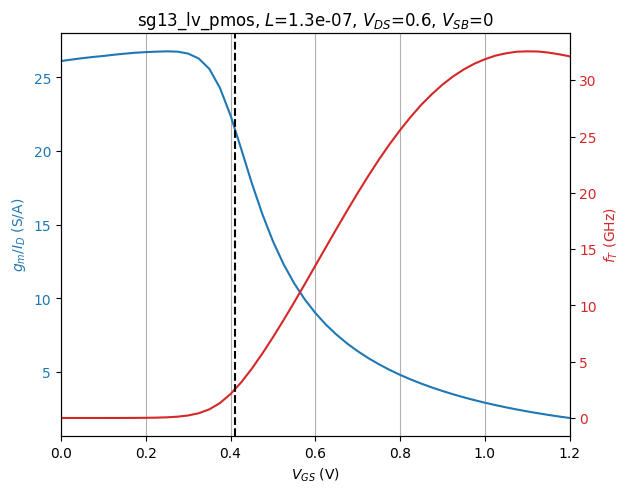

In [75]:
# plot gm/ID and fT versus gate bias
L1 = min(l); VDS1=0.6; VSB1=0
df1 = df.loc[(df['l'] == L1) & (df['vd'] == VDS1)& (df['vb'] == -VSB1)]
gm_id1 = df1['gm'].values/df1['ids'].values
cgg1 = df1['cgg'].values + df1['cgsol'].values + df1['cgdol'].values
ft1 = df1['gm'].values/cgg1/2/np.pi
fig, ax1 = plt.subplots()
ax1.grid(axis='x')
ax1.set_xlabel('$V_{GS}$ (V)')
color = 'tab:blue'
ax1.set_ylabel('$g_m/I_D$ (S/A)', color=color)
ax1.plot(vgs, gm_id1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('$f_T$ (GHz)', color=color)
ax2.plot(vgs, ft1/1e9, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.title(devices[choice]+', $L$='+str(L1)+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.xlim(0, max(vgs))
plt.axvline(x = df1['vth'].values[0], color='k', linestyle='--')
plt.show()

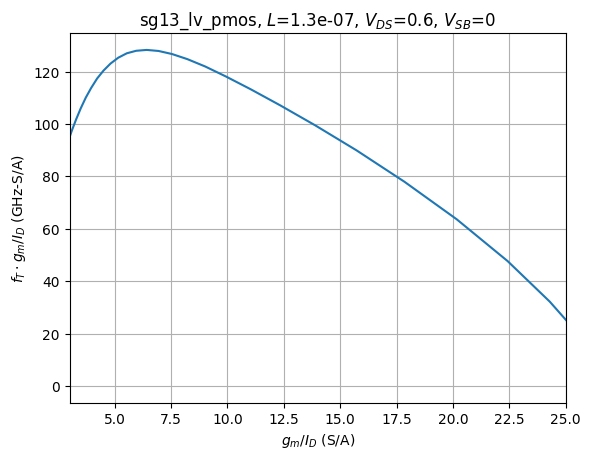

In [76]:
# plot product of gm/ID and fT versus gm/ID
plt.plot(gm_id1, gm_id1*ft1/1e9)
plt.xlim(3, 25)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$f_T\cdot g_m/I_D$ (GHz-S/A)')
plt.title(devices[choice]+', $L$='+str(L1)+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.grid()
plt.show()

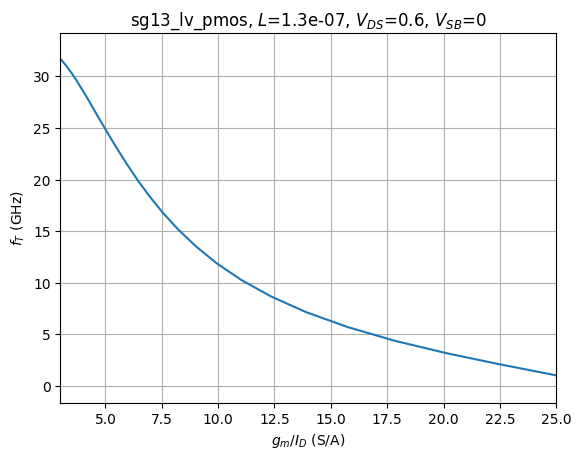

In [77]:
# plot fT versus gm/ID
plt.plot(gm_id1, ft1/1e9)
plt.xlim(3, 25)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$f_T$ (GHz)')
plt.title(devices[choice]+', $L$='+str(L1)+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.grid()
plt.show()

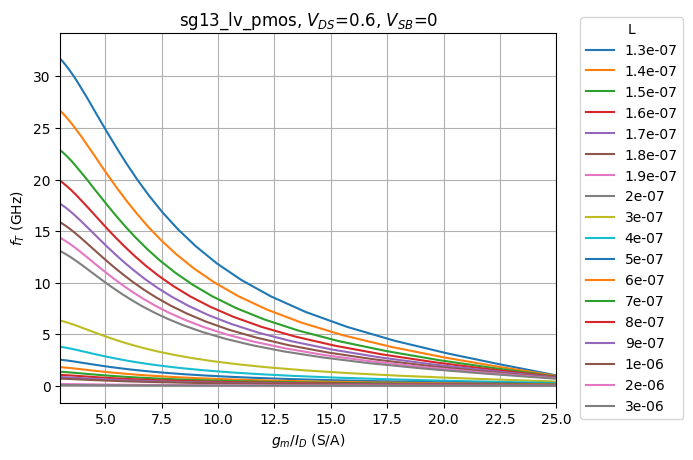

In [78]:
# plot fT versus gm/ID for all L
VDS2=0.6; VSB2=0
df2 = df.loc[ (df['vd'] == VDS2) & (df['vb'] == -VSB2)]
df2
gm_id2 = df2['gm'].values/df2['ids'].values
gm_id2 = np.reshape(gm_id2, (len(vgs), -1), order='F')
ft2 = df2['gm'].values/(df2['cgg'].values + df2['cgsol'].values + df2['cgdol'].values)/2/np.pi
ft2 = np.reshape(ft2, (len(vgs), -1), order='F')

fig, ax = plt.subplots()
ax.plot(gm_id2, ft2/1e9)
ax.legend(loc='center right', bbox_to_anchor=(1.27, 0.5), title='L', labels=l.tolist())
plt.xlim(3, 25)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$f_T$ (GHz)')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.grid()
plt.show()

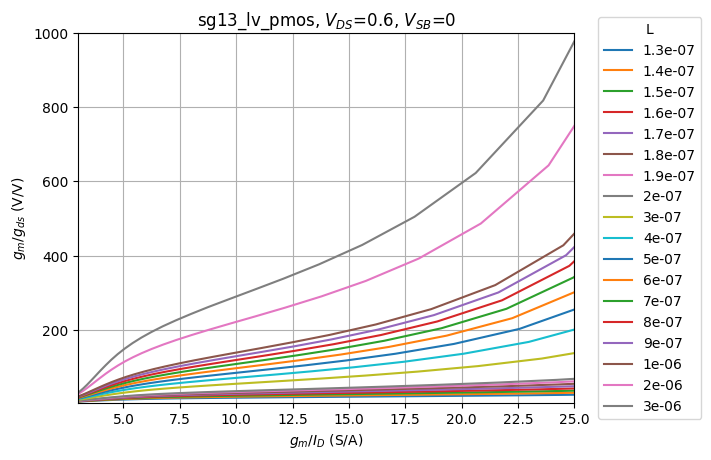

4283.730158730159


In [79]:
# plot gm/gds versus gm/ID for all L
gm_gds2 = df2['gm'].values/df2['gds'].values
gm_gds2 = np.reshape(gm_gds2, (len(vgs), -1), order='F')

fig, ax = plt.subplots()
ax.plot(gm_id2, gm_gds2)
ax.legend(loc='center right', bbox_to_anchor=(1.27, 0.5), title='L', labels=l.tolist())
plt.xlim(3, 25)
plt.ylim(3, 1000)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$g_m/g_{ds}$ (V/V)')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.grid()
plt.show()
print(np.amax(gm_gds2))

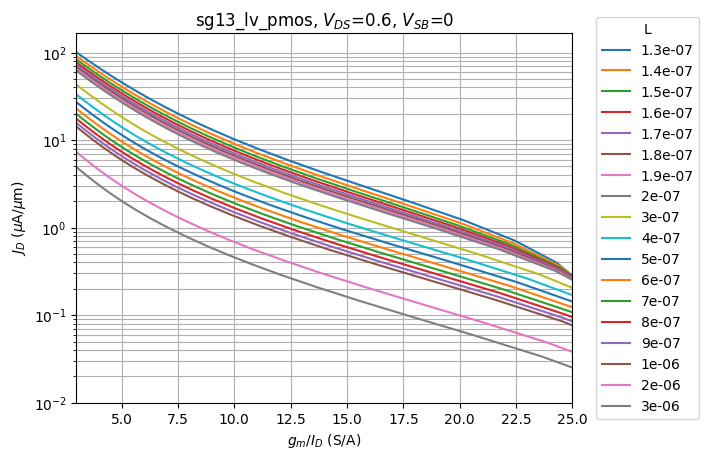

In [80]:
# plot jd versus gm/ID for all L
jd2 = df2['ids'].values/w[choice]/1e-6
jd2 = np.reshape(jd2, (len(vgs), -1), order='F')

fig, ax = plt.subplots()
ax.semilogy(gm_id2, jd2)
ax.legend(loc='center right', bbox_to_anchor=(1.27, 0.5), title='L', labels=l.tolist())
plt.xlim(3, 25)
plt.ylim(1e-2, np.amax(jd2))
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$J_D$ ($\mu$A/$\mu$m)')
plt.grid(which='minor')
plt.grid(which='major')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.show()

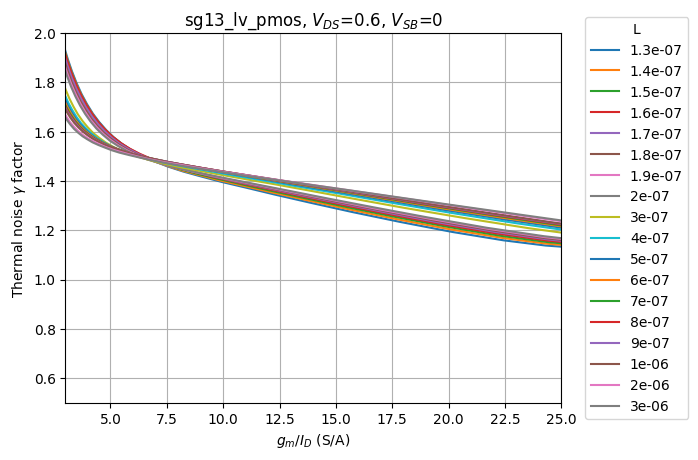

In [81]:
# plot gamma versus gm/ID for all L
gamma = df2['sid'].values / df2['gm'].values/4/300/1.38e-23
gamma = np.reshape(gamma, (len(vgs), -1), order='F')

fig, ax = plt.subplots()
ax.plot(gm_id2, gamma)
ax.legend(loc='center right', bbox_to_anchor=(1.27, 0.5), title='L', labels=l.tolist())
plt.xlim(3, 25)
plt.ylim(0.5, 2)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('Thermal noise $\gamma$ factor')
plt.grid(which='minor')
plt.grid(which='major')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.show()

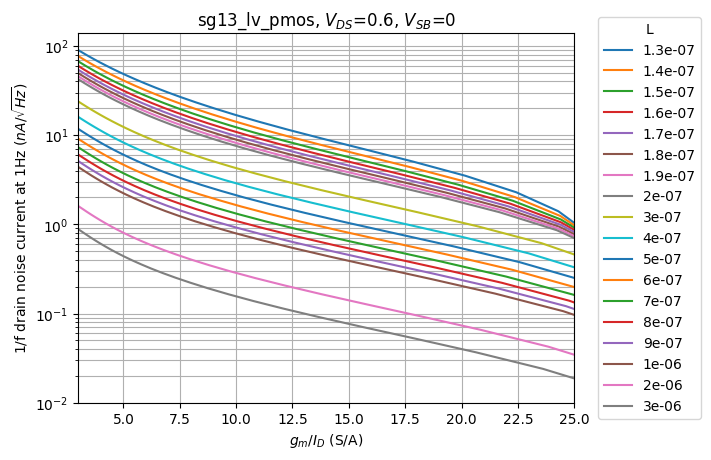

In [82]:
# plot flicker noise drain current at 1Hz versus gm/ID for all L
n1overf = df2['sfl'].values
n1overf = np.reshape(n1overf, (len(vgs), -1), order='F')

fig, ax = plt.subplots()
ax.semilogy(gm_id2, np.sqrt(n1overf)/1e-9)
ax.legend(loc='center right', bbox_to_anchor=(1.27, 0.5), title='L', labels=l.tolist())
plt.xlim(3, 25)
plt.ylim(1e-2, np.amax(np.sqrt(n1overf)/1e-9))
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('1/f drain noise current at 1Hz ($nA/ \sqrt{Hz}$)')
plt.grid(which='minor')
plt.grid(which='major')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.show()

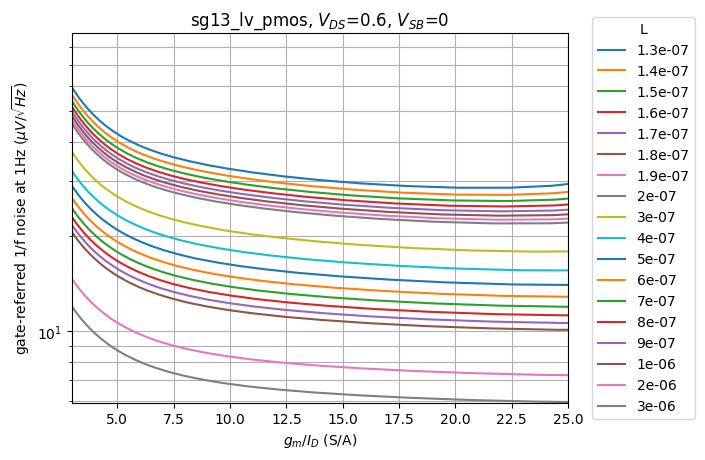

In [83]:
# plot gate-referred 1/f noise at 1Hz versus gm/ID for all L
n1overf_gate = df2['sfl'].values / df2['gm'].values**2
n1overf_gate = np.reshape(n1overf_gate, (len(vgs), -1), order='F')

fig, ax = plt.subplots()
ax.semilogy(gm_id2, np.sqrt(n1overf_gate)/1e-6)
ax.legend(loc='center right', bbox_to_anchor=(1.27, 0.5), title='L', labels=l.tolist())
plt.xlim(3, 25)
plt.ylim(np.amin(np.sqrt(n1overf_gate)/1e-6), np.amax(np.sqrt(n1overf_gate)/1e-6))
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('gate-referred 1/f noise at 1Hz ($\mu V/ \sqrt{Hz}$)')
plt.grid(which='minor')
plt.grid(which='major')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.show()